<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий


# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 1. Обзор библиотеки Pandas</center>

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [3]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [39]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'SIFILID']) 
print(salaries)                                                                 

Andrew     400
Bob        300
Charles    200
SIFILID    250
dtype: int64


In [47]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [6]:
print(salaries.Andrew == salaries['Andrew']) 

True


In [58]:
salaries['Carl'] = np.nan

In [61]:
salaries.fillna(salaries.median(), inplace=True)

In [62]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
SIFILID    250.0
Carl       275.0
dtype: float64

**Series поддерживает пропуски в данных.**

In [69]:
salaries.c = np.nan # Series can contain missing values
print(salaries.c)

nan


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [75]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
SIFILID    3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [71]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,0.995098,-0.083627,-0.569943
o2,0.730463,-0.249906,-0.716789
o3,1.304683,1.296061,1.221112
o4,0.142117,-0.789224,-0.412365
o5,-0.625896,-0.708846,-0.626463


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [90]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.885566,a,False
1,0.590413,b,False
2,0.118147,c,False
3,0.519125,d,True
4,0.650617,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [91]:
print('The element in position 3, B is', df2.at[3, 'B'], '\n')
print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.590413  b
4  0.650617  e


**Изменение элементов и добавление новых:**

In [92]:
df2.at[3, 'B'] = 'f'
df2

,A,B,C
0,0.885566,a,False
1,0.590413,b,False
2,0.118147,c,False
3,0.519125,f,True
4,0.650617,e,True


In [94]:
df2.loc[50] = [3.1415, 'c', False]
df2

,A,B,C
0,0.885566,a,False
1,0.590413,b,False
2,0.118147,c,False
3,0.519125,f,True
4,0.650617,e,True
5,3.141500,c,False
50,3.141500,c,False


In [96]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.995098,-0.0836271,-0.569943
o2,0.730463,-0.249906,-0.716789
o3,1.304683,1.29606,1.221112
o4,0.142117,-0.789224,-0.412365
o5,-0.625896,-0.708846,-0.626463
0,0.885566,a,0.000000
1,0.590413,b,0.000000
2,0.118147,c,0.000000
3,0.519125,f,1.000000
4,0.650617,e,1.000000


#### Обработка пропущенных значений

In [97]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,0.995098,-0.083627,-0.569943
o2,NaN,-0.249906,-0.716789
o3,1.304683,1.296061,1.221112
o4,0.142117,-0.789224,NaN
o5,-0.625896,-0.708846,-0.626463


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [19]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [20]:
df1.dropna(how='any')

,A,B,C
o1,-0.471992,2.592831,-0.011376
o3,-0.863523,-1.410745,0.244962
o5,-1.004103,0.241767,-1.281513


**Пропуски можно заменить каким-то значением.**

In [21]:
df1.fillna(0)

,A,B,C
o1,-0.471992,2.592831,-0.011376
o2,0.000000,0.324308,1.627838
o3,-0.863523,-1.410745,0.244962
o4,-1.275222,-1.912016,0.000000
o5,-1.004103,0.241767,-1.281513


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [102]:
df = pd.read_csv('../../data/beauty.csv', sep = ';')

**Посмотрим на размер данных и названия признаков.**

In [103]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'expyrs' 'union' 'healthy' 'black' 'female' 'married' 'service'
 'edu' 'looks']


In [106]:
df.tail(100)

,wage,expyrs,union,healthy,black,female,married,service,edu,looks
1160,3.75,29,0,1,0,0,0,1,8,3
1161,2.00,13,0,1,0,1,0,0,12,3
1162,2.26,10,0,1,0,1,1,0,12,2
1163,2.88,12,0,1,0,1,1,0,13,4
1164,4.69,7,1,1,0,1,1,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [107]:
df.head(4)

,wage,expyrs,union,healthy,black,female,married,service,edu,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [108]:
df.describe()

,wage,expyrs,union,healthy,black,female,married,service,edu,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [114]:
df[df.looks == 5].sort_values(by='wage', ascending = False)

,wage,expyrs,union,healthy,black,female,married,service,edu,looks
76,23.32,15,0,1,0,0,1,1,17,5
27,19.08,17,0,1,0,0,0,0,17,5
26,14.84,29,0,1,0,0,0,1,13,5
659,12.66,22,1,1,0,0,1,0,12,5
363,10.66,8,0,1,0,0,0,0,13,5
653,7.96,15,0,1,0,0,1,0,12,5
112,6.11,7,0,1,0,1,1,0,12,5
512,5.09,7,0,1,0,1,0,0,17,5
562,4.95,10,0,1,1,1,0,0,14,5
952,4.81,6,0,1,0,0,1,0,16,5


In [115]:
df.sort_values(by=['female', 'wage'],
        ascending=[True, False]).head()

,wage,expyrs,union,healthy,black,female,married,service,edu,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [117]:
df['healthy'].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [120]:
df[df['female'] == 1].mean()

wage        4.299358
expyrs     14.142202
union       0.211009
healthy     0.919725
black       0.114679
female      1.000000
married     0.488532
service     0.438073
edu        12.596330
looks       3.201835
dtype: float64

In [31]:
df[(df['goodhlth'] == 1) & 
   (df['female'] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [125]:
print(df[(df['female'] == 0)]['wage'].mean() - \
df[(df['female'] == 1)]['wage'].mean(), \
df[(df['female'] == 0)]['expyrs'].mean() - \
df[(df['female'] == 1)]['expyrs'].mean(),
df[(df['female'] == 0)]['edu'].mean() - \
df[(df['female'] == 1)]['edu'].mean()
     )

3.069465017368837 6.2145942816424675 -0.05021377037498809


**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [127]:
df[(df['female'] == 0) & (df['union'] == 1)  
   & (df['expyrs'] < 10)]['wage'].max()

12.82

**Применение функции к каждому столбцу:**

In [142]:
df.apply(np.sum) 

wage        7946.43
expyrs     22940.00
union        343.00
healthy     1176.00
black         93.00
female       436.00
married      871.00
service      345.00
edu        15830.00
looks       4014.00
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [143]:
df['looks'].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [146]:
g = df.groupby('looks') 
for (_, sub_df) in g:
    print(sub_df['wage'].mean(), sub_df['looks'].mean(),_)

4.621538461538462 1.0 1
5.328802816901409 2.0 2
6.504598337950134 3.0 3
6.299340659340659 4.0 4
7.38842105263158 5.0 5


**Обращение к конкретной группе:**

In [37]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

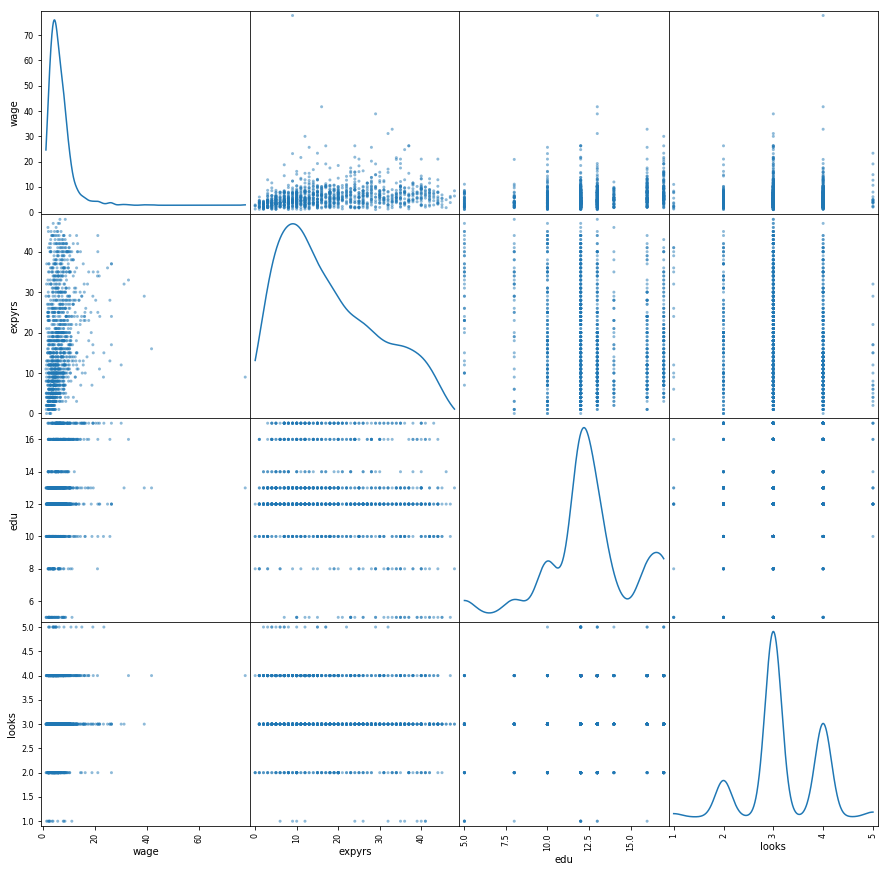

In [149]:
pd.plotting.scatter_matrix(df[['wage', 'expyrs', 'edu', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

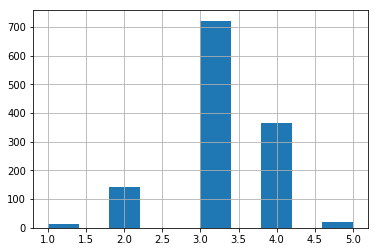

In [150]:
df['looks'].hist()

**Или сразу для всех:**

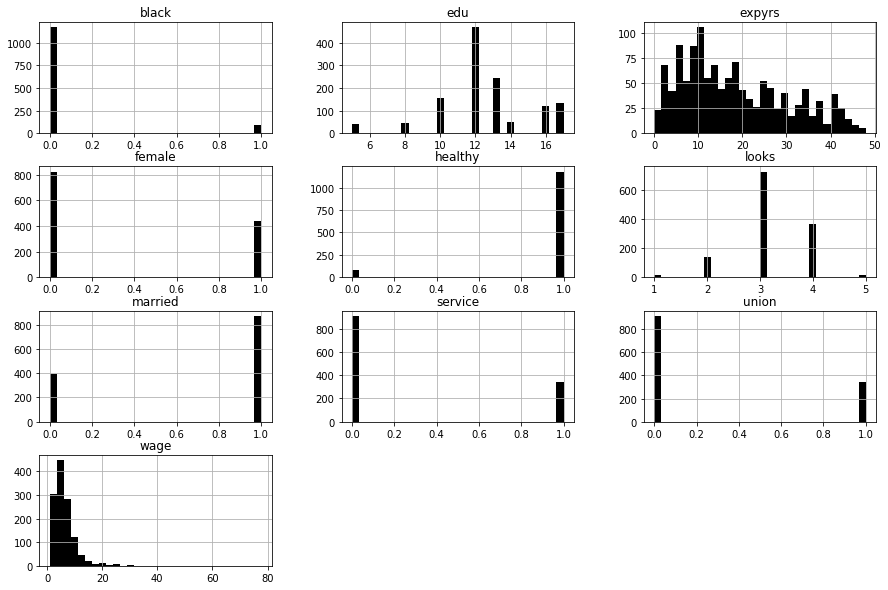

In [151]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

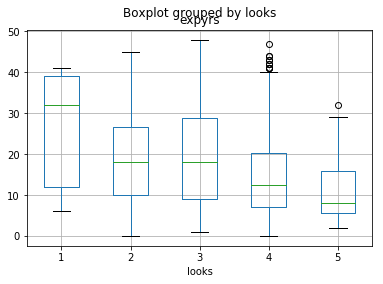

In [154]:
df.boxplot(column='expyrs', by='looks')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

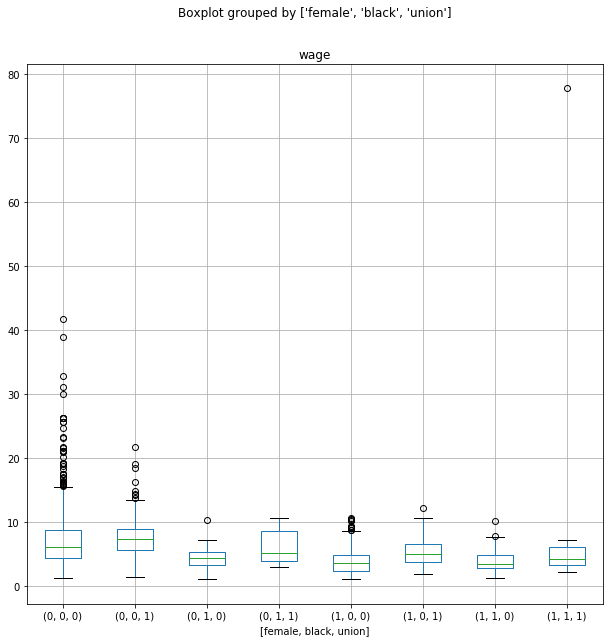

In [158]:
df.boxplot(column='wage',  by=['female', 'black', 'union'], 
           figsize=(10,10))
plt.show()